In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [15]:
data=pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\PCA\\PCA\\wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [1]:
# Task 1: Exploratory Data Analysis (EDA)
data.info()

NameError: name 'data' is not defined

In [19]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


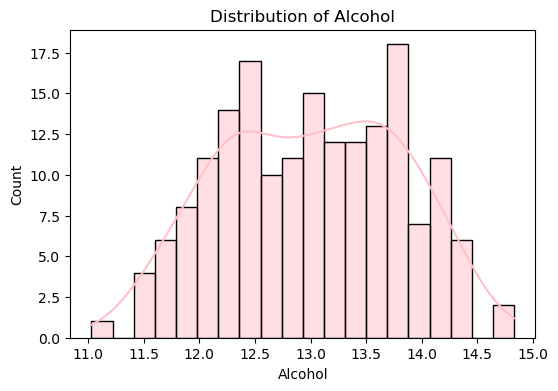

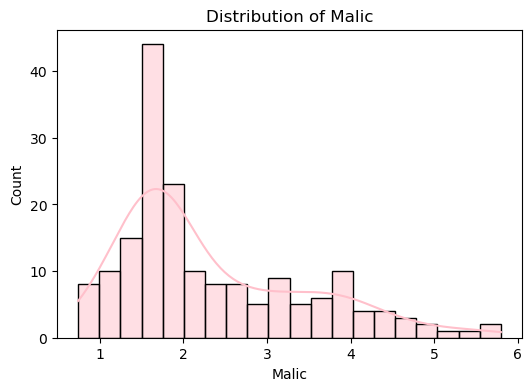

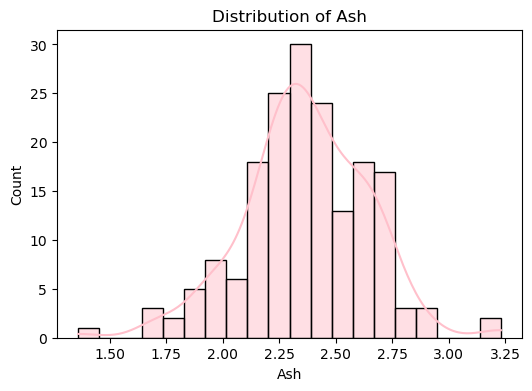

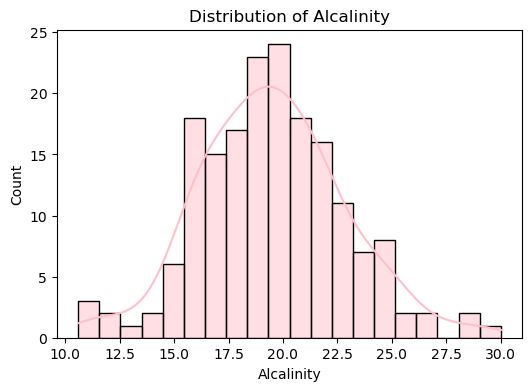

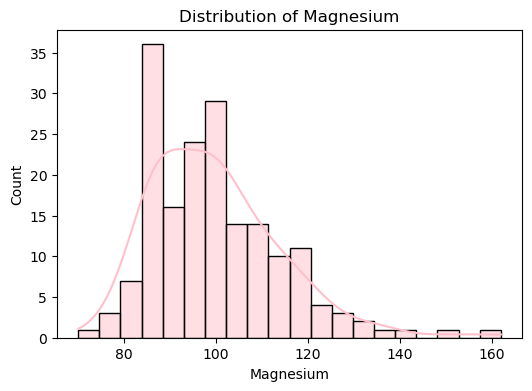

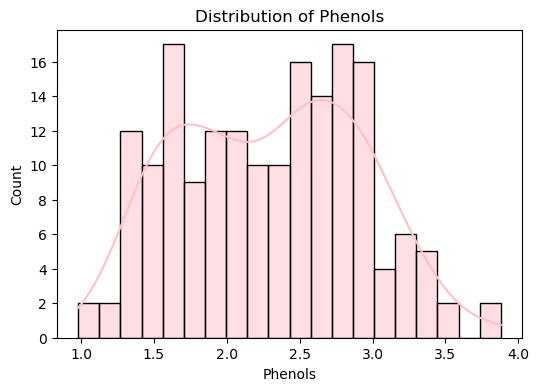

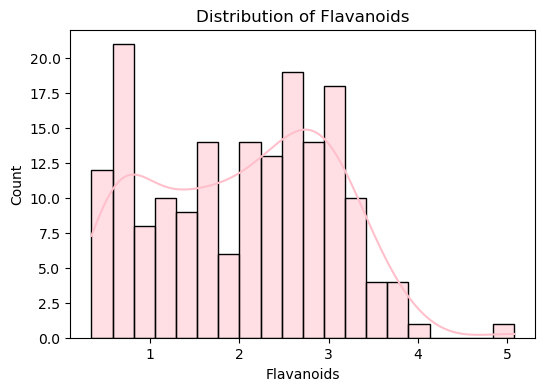

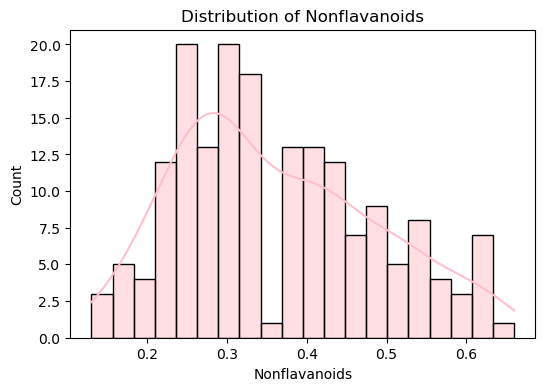

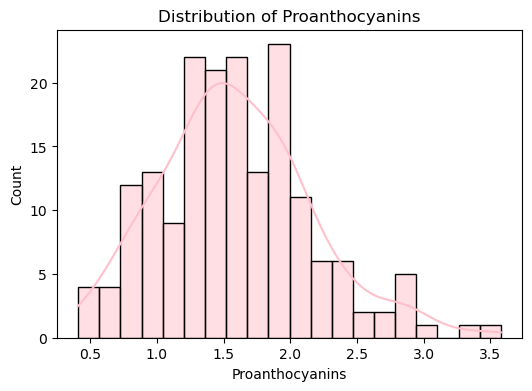

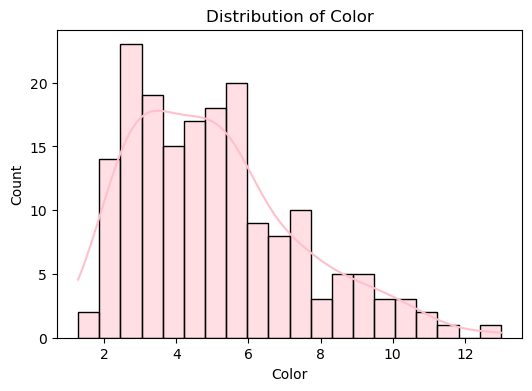

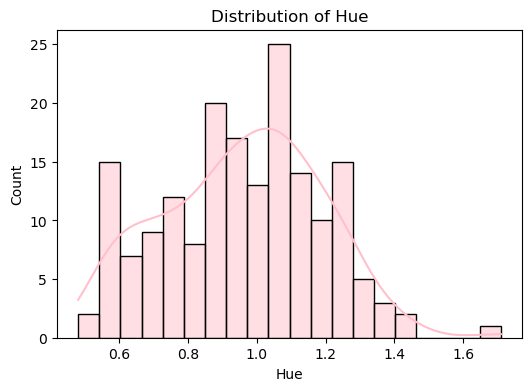

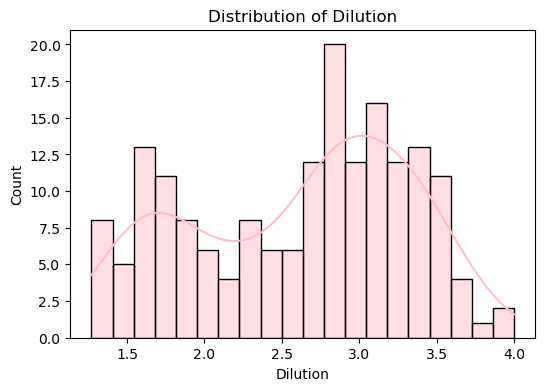

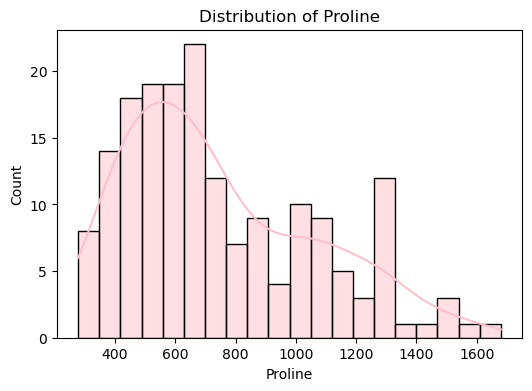

In [23]:
columns = data.columns[1:]
for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True , bins=20, color='pink')
    plt.title(f"Distribution of {col}")
    plt.show()

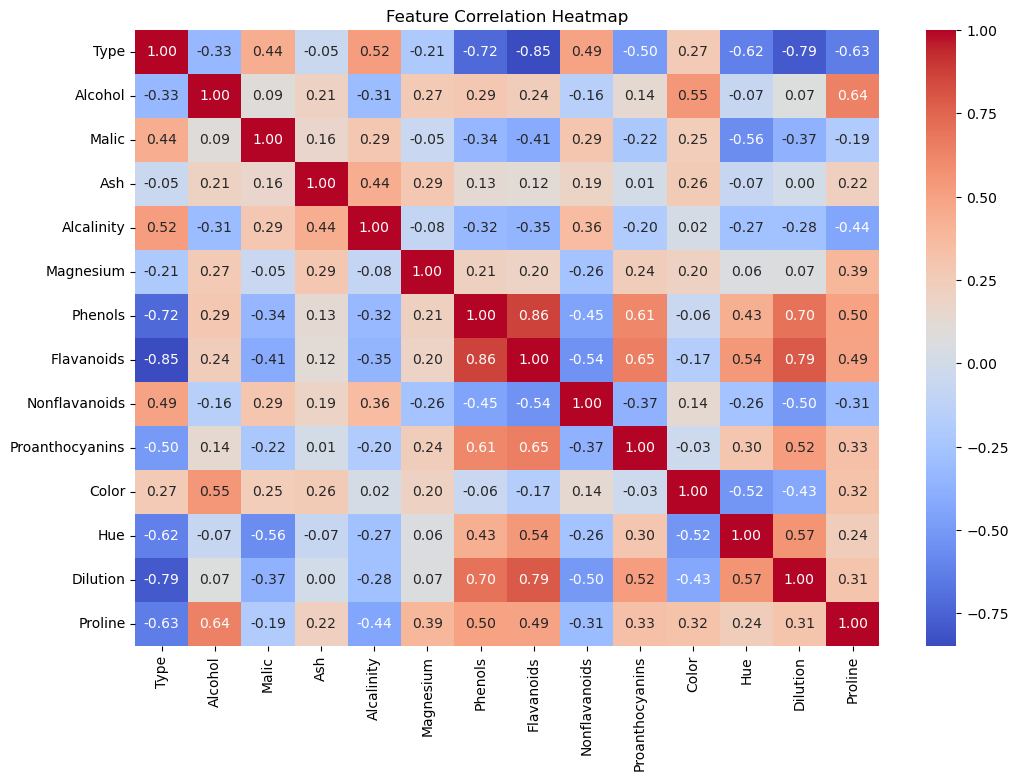

In [25]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True , cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

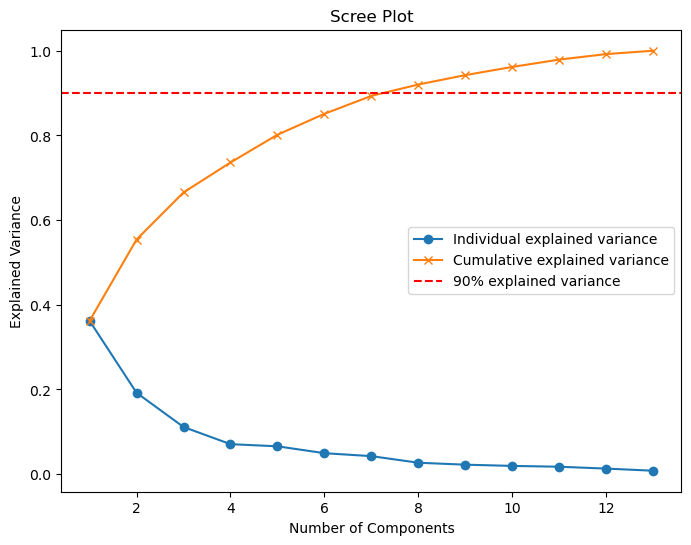

In [37]:
#Task 2: Dimensionality Reduction with PCA
features = data.iloc[:, 1:]  # Exclude 'Type' column
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_features)

# Scree plot and cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', label='Individual explained variance')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='x', label='Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()


In [39]:
# Selecting optimal components (e.g., 90% variance)
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
print(f"Optimal number of components: {optimal_components}")

pca_reduced = PCA(n_components=optimal_components)
pca_transformed_data = pca_reduced.fit_transform(scaled_features)

Optimal number of components: 8


C:\Users\91755\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


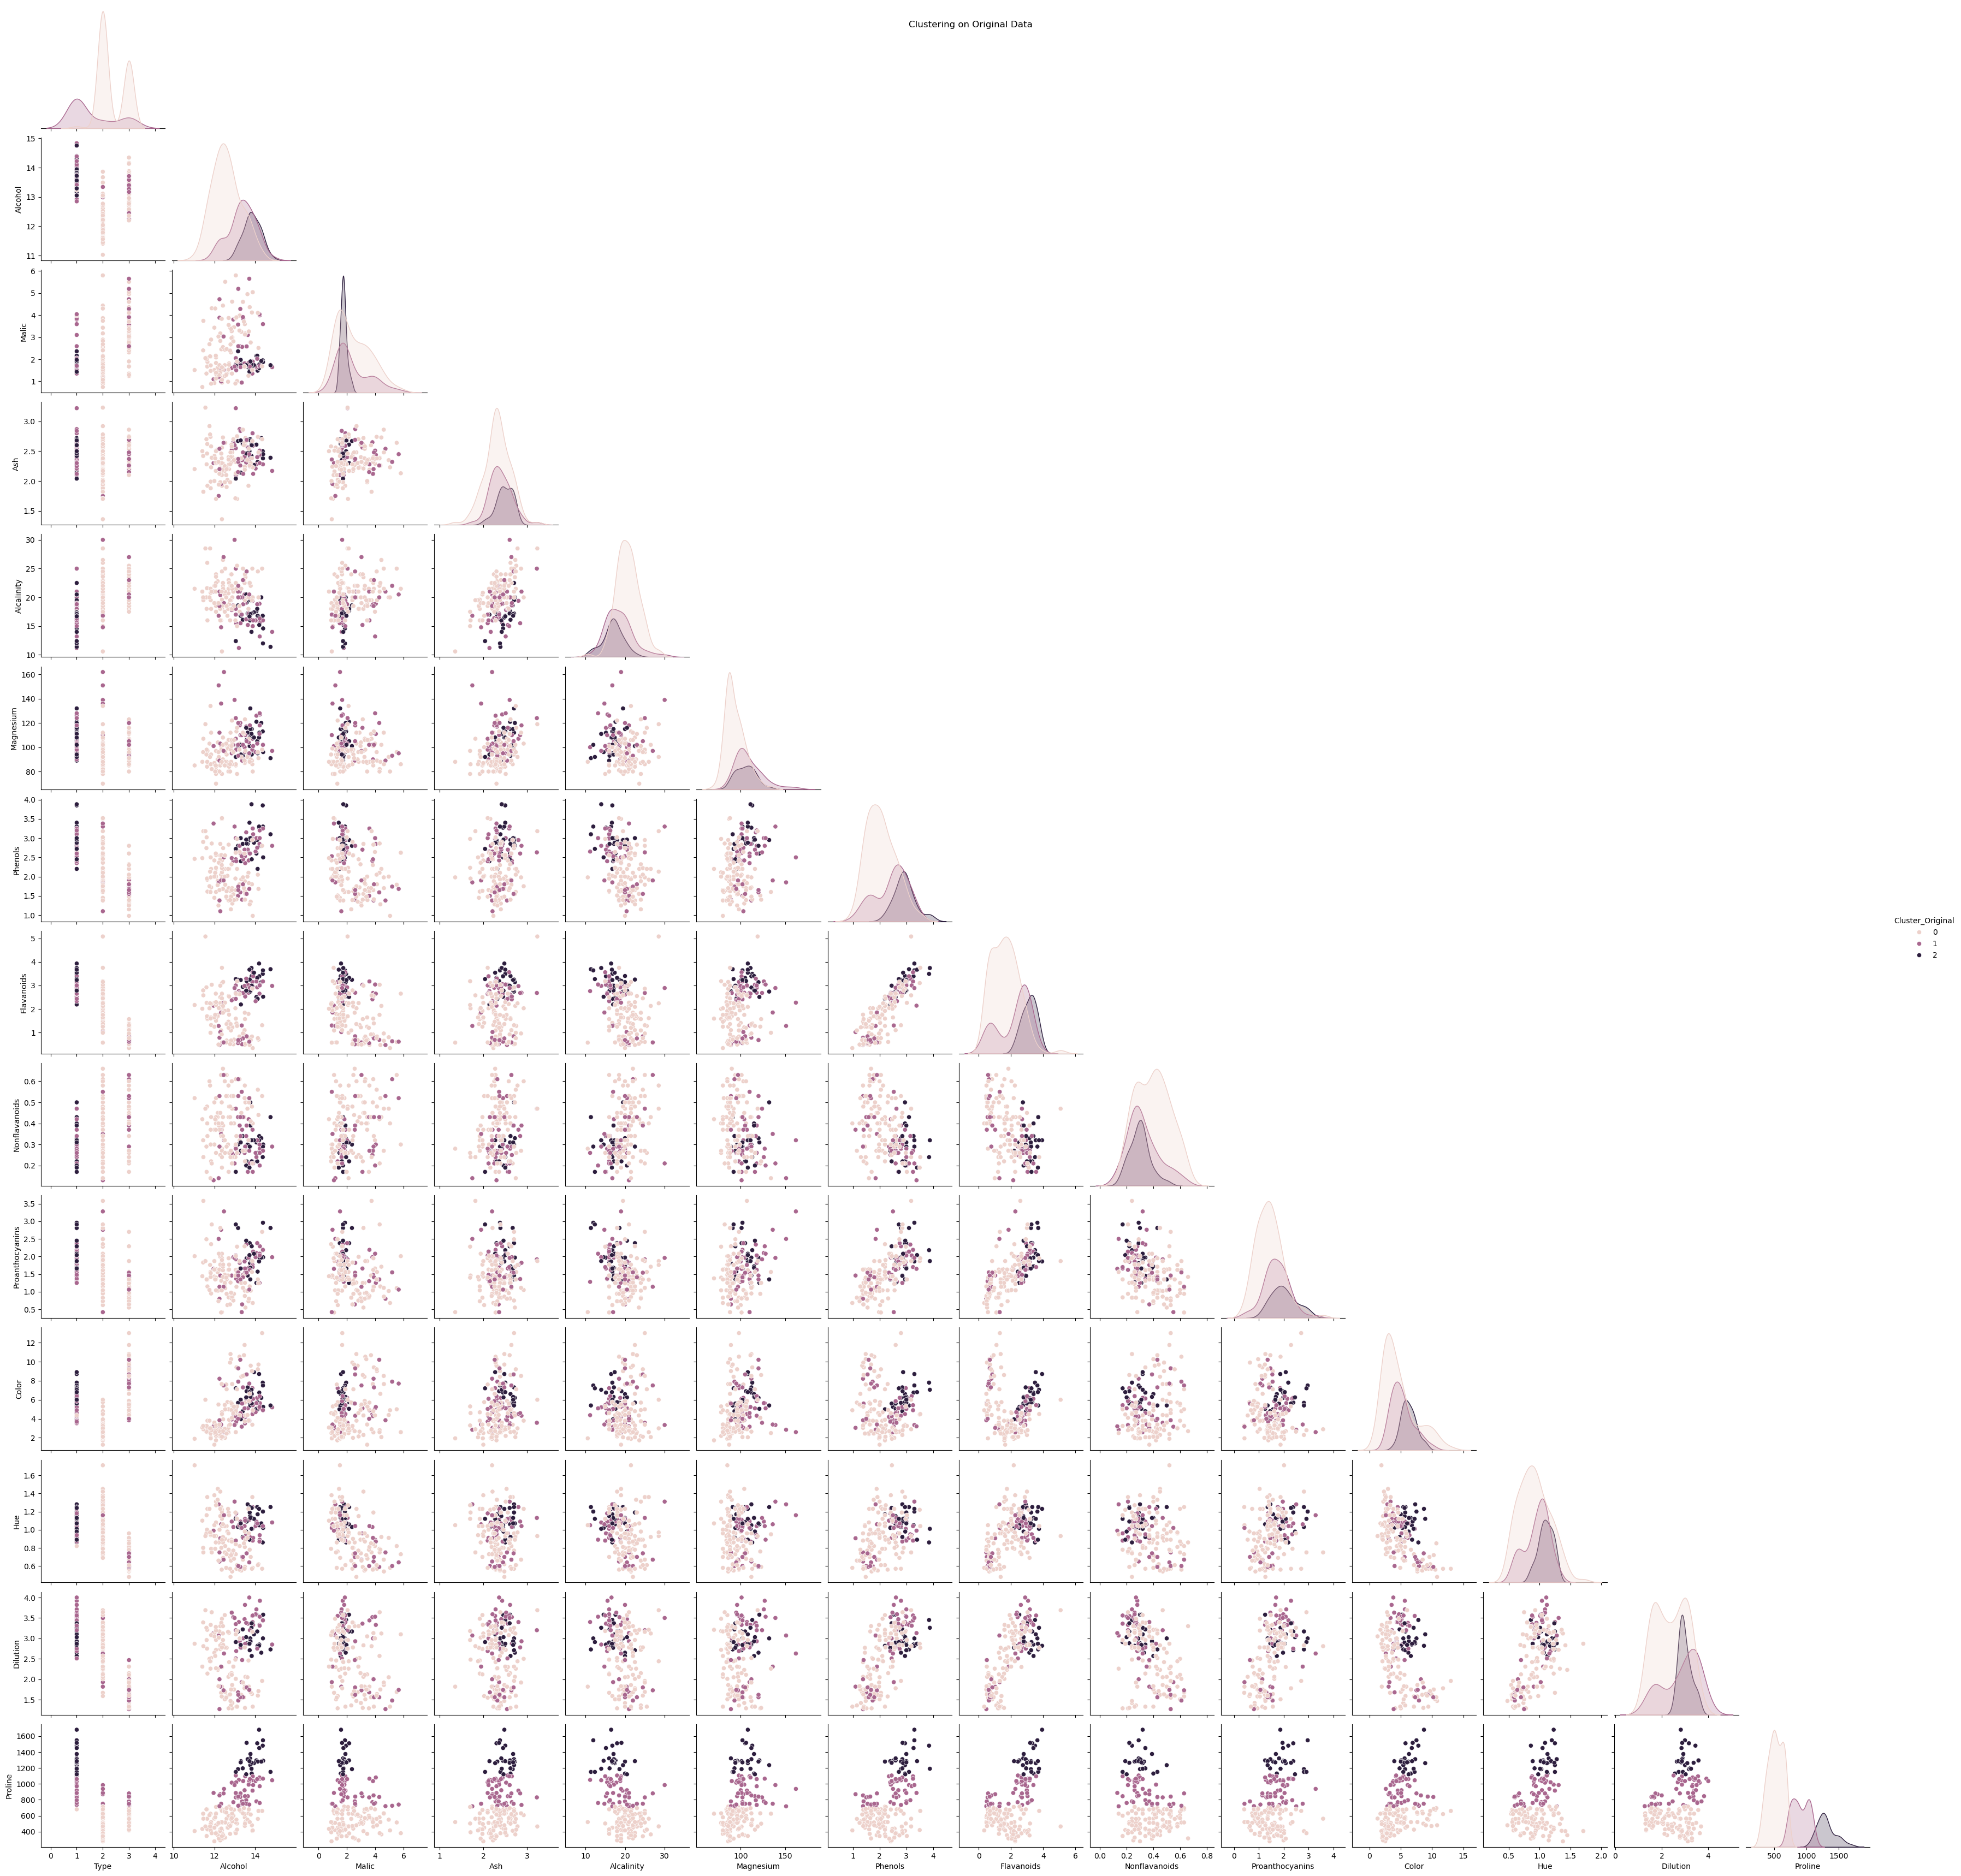

In [48]:
# Task 3: Clustering with Original Data
# K-Means Clustering
kmeans_original = KMeans(n_clusters=3, random_state=42)  # 3 clusters for wine data
kmeans_original.fit(features)
data['Cluster_Original'] = kmeans_original.labels_

# Visualize clustering
sns.pairplot(data, hue='Cluster_Original', diag_kind='kde', corner=True)
plt.suptitle("Clustering on Original Data")
plt.show()


In [50]:
# Clustering metrics
silhouette_original = silhouette_score(features, kmeans_original.labels_)
dbi_original = davies_bouldin_score(features, kmeans_original.labels_)
print(f"Silhouette Score (Original Data): {silhouette_original:.2f}")
print(f"Davies-Bouldin Index (Original Data): {dbi_original:.2f}")

Silhouette Score (Original Data): 0.56
Davies-Bouldin Index (Original Data): 0.55


C:\Users\91755\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


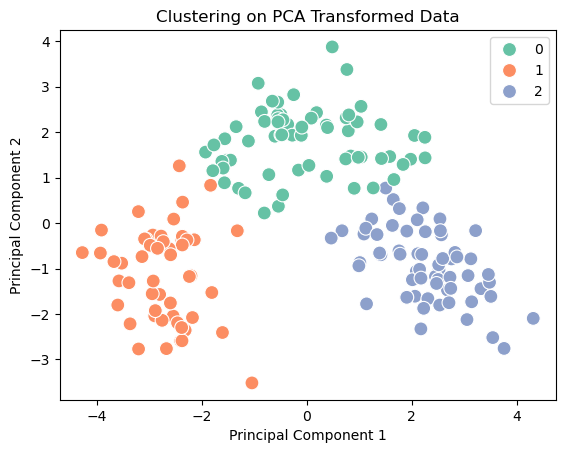

In [52]:
#Task 4: Clustering with PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_transformed_data)
data['Cluster_PCA'] = kmeans_pca.labels_

# Visualize clustering
sns.scatterplot(x=pca_transformed_data[:, 0], y=pca_transformed_data[:, 1], hue=data['Cluster_PCA'], palette='Set2', s=100)
plt.title("Clustering on PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [54]:
# Clustering metrics
silhouette_pca = silhouette_score(pca_transformed_data, kmeans_pca.labels_)
dbi_pca = davies_bouldin_score(pca_transformed_data, kmeans_pca.labels_)
print(f"Silhouette Score (PCA Data): {silhouette_pca:.2f}")
print(f"Davies-Bouldin Index (PCA Data): {dbi_pca:.2f}")

Silhouette Score (PCA Data): 0.31
Davies-Bouldin Index (PCA Data): 1.27


In [56]:
# Task 5: Comparison and Analysis
print("Comparison of Clustering Results:")
print(f"Silhouette Score: Original = {silhouette_original:.2f}, PCA = {silhouette_pca:.2f}")
print(f"Davies-Bouldin Index: Original = {dbi_original:.2f}, PCA = {dbi_pca:.2f}")

Comparison of Clustering Results:
Silhouette Score: Original = 0.56, PCA = 0.31
Davies-Bouldin Index: Original = 0.55, PCA = 1.27


In [58]:
# Task 6: Conclusion and Insights
print("\nConclusion and Insights:")
print("1. PCA effectively reduced dimensionality while retaining significant variance.")
print("2. Clustering performance metrics suggest that PCA-transformed data may simplify patterns, improving clustering efficiency in some cases.")
print("3. Use PCA for high-dimensional data to avoid redundancy and improve model performance.")


Conclusion and Insights:
1. PCA effectively reduced dimensionality while retaining significant variance.
2. Clustering performance metrics suggest that PCA-transformed data may simplify patterns, improving clustering efficiency in some cases.
3. Use PCA for high-dimensional data to avoid redundancy and improve model performance.
